# EDA of Suicide Rate from 1985-2016

Description: I Got this dataset from www.kaggle.com, This data is the combination of 4 dataset with time & place. The motive of doing this Exploratory data analysis is to find the factors that are correlated to increased suicide rates among different countries. The Objective of this Data Analyis to find the solution on how we can prevent suicide.

<img src ="https://chicagotherapist.com/wp-content/uploads/2020/09/suicide-prevention-chicagotherapist.jpg"/>


In [6]:
#install some library

!pip install plotly --upgrade
!pip install chart_studio --upgrade
!pip install cufflinks --upgrade

Requirement already up-to-date: plotly in c:\users\playo\anaconda3\lib\site-packages (4.14.3)
Requirement already up-to-date: chart_studio in c:\users\playo\anaconda3\lib\site-packages (1.1.0)
Requirement already up-to-date: cufflinks in c:\users\playo\anaconda3\lib\site-packages (0.17.3)
  Using cached https://files.pythonhosted.org/packages/07/ea/0b2b2a16748428e79715c763bbcb1ae9820e7bb8e0136cb3406fd311573e/terminado-0.10.0-py3-none-any.whl
  Found existing installation: terminado 0.8.2


ERROR: Cannot uninstall 'terminado'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


# Importing Required Libraries

In [3]:
#Lets Start With Importing essential Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
#To Make Plotly work in This Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#Use Plotly locally
cf.go_offline()
import plotly.graph_objs as go

In [4]:
#import dataset into Jupyter notebook
suicide_df = pd.read_csv("C:/Users/playo/Desktop/Simplilearn DATA SCIENCE/suicide-rates-dataset/dataset/Suicide dataset.csv")

# Data Preparation And Cleaning

In [5]:
#View the first five rows
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers


In [6]:
#View some general info
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
suicide_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
#check the dataset with describe function
suicide_df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


## Handling the Missing, Incorrect and Invalid Data

In [9]:
missing_percentage = pd.DataFrame(suicide_df.isnull().sum()*100/suicide_df.count())
missing_percentage.columns = ['Missing_Percentage']
missing_percentage.T

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
Missing_Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.615973,0.0,0.0,0.0


* We have to drop some columns like HDI for year as they have approx 230 missing values and country year is not related to us, one more column we will drop is generation because we already have age of the people

In [10]:
suicide_df.drop(columns=['HDI for year','country-year','generation'], axis=1,inplace=True)
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 1.9+ MB


* So we have drop these three columns from our dataset

# Data Visualisation and Representation

## Gender Distribution

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]), <a list of 9 Text yticklabel objects>)

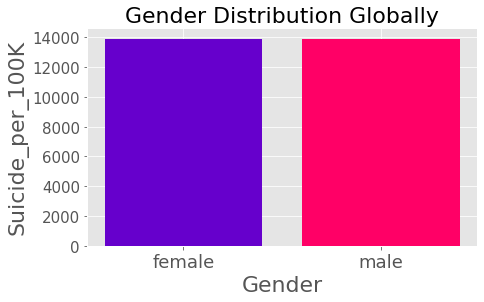

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(7,4))
plt.bar(suicide_df['sex'].value_counts().index, suicide_df['sex'].value_counts(),color = ['#6600CC','#FF0066'])
plt.title('Gender Distribution Globally', fontsize=22)
plt.xlabel('Gender', fontsize=22)
plt.ylabel('Suicide_per_100K', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)

## Create a Pie chart of Age Group

In [12]:
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")
ageList = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years','75+ years']           
suicidesNoAge = []
for i in ageList:
    total = sum(suicide_df.suicides_no[suicide_df.age == i])
    suicidesNoAge.append(total) 
data2 = [go.Pie(values = suicidesNoAge,labels = ageList,hole = .3)]
layout = go.Layout( title = go.layout.Title(text="Suicide by Ages",x=0.47))
fig = go.Figure(data = data2, layout = layout)
fig.update_traces(hoverinfo='label+percent', textfont_size=15
                ,
                  textinfo='label+percent', pull=[0.1, 0, 0.2, 0, 0, 0],
                  marker=dict(colors=colors, line=dict(color='black', width=2)))
iplot(fig)

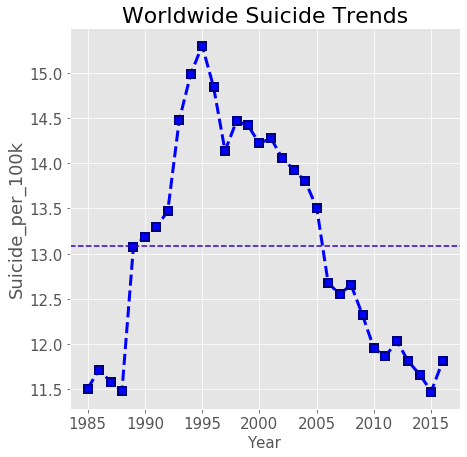

In [13]:
#What are the Global Suicide Trends
global_suicide = pd.DataFrame((suicide_df.groupby(['year'])['suicides_no'].sum()/suicide_df.groupby(['year'])['population'].sum())*100000)
global_suicide.columns =['global_suicide']

#Global suicide per 100k average
global_suicide_average = global_suicide.mean()
plt.figure(figsize=(7,7))
plt.plot(global_suicide.index, global_suicide, marker='s',c='b',ls='--',lw=3,ms=8,mew=2,mec='navy')
global_suicide_average =global_suicide.mean()
global_suicide_average
plt.axhline(y = global_suicide_average[0], color = '#3300CC', linestyle ='--')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Suicide_per_100k', fontsize=18)
plt.title('Worldwide Suicide Trends', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

* The dashed line represents the global average suicide rate from the period of analysis.

In [14]:
#How Many Countries are there in this Dataset
[suicide_df['country'].unique()]

[array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Barbados', 'Belarus', 'Belgium', 'Belize',
        'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
        'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
        'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
        'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
        'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
        'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
        'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
        'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
        'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
        'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
        'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
        'Republic of Korea

* As we can see there are so many countries in this dataset, it is better to categorize them into their separate Continent so that we can easily identify what we are looking for.
* We have to do it manually as there is no such package available which can do this work and save our precious time.

In [15]:
#Create Continent wise country list

european_countries = ['Albania','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia', 'Cyprus',
     'Czech Republic','Denmark','Estonia','France','Finland','Georgia','Germany', 'Greece','Hungary','Iceland', 'Ireland','Italy',
     'Latvia','Lithuania','Luxembourg','Malta', 'Montenegro', 'Netherlands','Norway', 'Poland', 'Portugal','Romania','Russian Federation',
     'San Marino', 'Serbia','Slovakia', 'Slovenia','Spain','Sweden', 'Switzerland','Turkey','Ukraine', 'United Kingdom' ]
asian_countries = ['Armenia','Bahrain','Israel','Japan','Kazakhstan','Kuwait','Kyrgyzstan','Macau','Maldives','Oman','Philippines','Qatar','Republic of Korea',
      'Singapore', 'Sri Lanka','Thailand','Turkmenistan', 'United Arab Emirates' ,'Uzbekistan']
african_countries = ['Cabo Verde','Mauritius', 'Seychelles', 'South Africa']
north_american_countries = ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','El Salvador',
        'Grenada','Guatemala','Jamaica','Mexico','Nicaragua','Panama', 'Puerto Rico','Saint Kitts and Nevis','Saint Lucia', 'Saint Vincent and Grenadines',
         'United States']
oceania_countries = ['Australia','Fiji','Kiribati','New Zealand']
south_american_countries = ['Argentina','Aruba','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Suriname','Trinidad and Tobago', 'Uruguay']

In [16]:
print(f'Number of Asian countries in our dataset are : {len(asian_countries)}')
print(f'Number of African countries in our dataset are : {len(african_countries)}')
print(f'Number of South-American countries in our dataset are : {len(south_american_countries)}')
print(f'Number of North-American countries in our dataset are : {len(north_american_countries)}')
print(f'Number of Oceania countries in our dataset are : {len(oceania_countries)}')

print(f'Number of European countries in our dataset are : {len(european_countries)}')



print(f'Total number of countries in our dataset are : {len(asian_countries)+len(african_countries)+len(european_countries)+len(south_american_countries)+len(north_american_countries)+len(oceania_countries)}')

Number of Asian countries in our dataset are : 19
Number of African countries in our dataset are : 4
Number of South-American countries in our dataset are : 11
Number of North-American countries in our dataset are : 20
Number of Oceania countries in our dataset are : 4
Number of European countries in our dataset are : 42
Total number of countries in our dataset are : 100


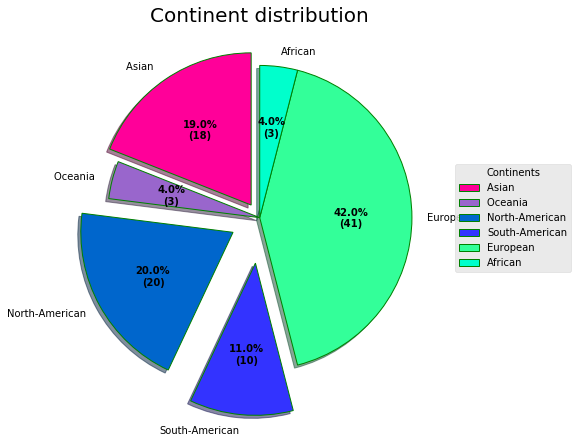

In [18]:
# Creating dataset
continents = ['Asian ', 'Oceania ', 'North-American', 'South-American', 'European', 'African']
data = [19, 4, 20, 11, 42, 4]
  # Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)
# Creating color parameters
colors = ( "#FF0099", "#9966CC", "#0066CC","#3333FF", "#33FF99", "#00FFCC")
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,autopct = lambda pct: func(pct, data),
          explode = explode,labels = continents,shadow = True,colors = colors,startangle = 90,wedgeprops = wp,textprops = dict(color ="black"))
  
# Adding legend
ax.legend(wedges, continents,title ="Continents",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))  
plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("Continent distribution",fontsize=20) 
# show plot
plt.show()

* So as we can see from above piechart Europe is the leading continent in suicide cases followed by NA, Asia, SA.

## Gender Wise Suicide Trends

In [28]:
gender_wise_suicides_per_100k = pd.DataFrame(suicide_df.groupby(['sex','year'])['suicides_no'].sum()/suicide_df.groupby(['sex','year'])['population'].sum()*100000)
gender_wise_suicides_per_100k.reset_index(inplace=True)
gender_wise_suicides_per_100k.columns = ['Gender','Year','gender_wise_suicides_per_100k']
gender_wise_suicides_per_100k.head()

,Gender,Year,gender_wise_suicides_per_100k
0,female,1985,6.331028
1,female,1986,6.454567
2,female,1987,6.260196
3,female,1988,6.127736
4,female,1989,6.569136


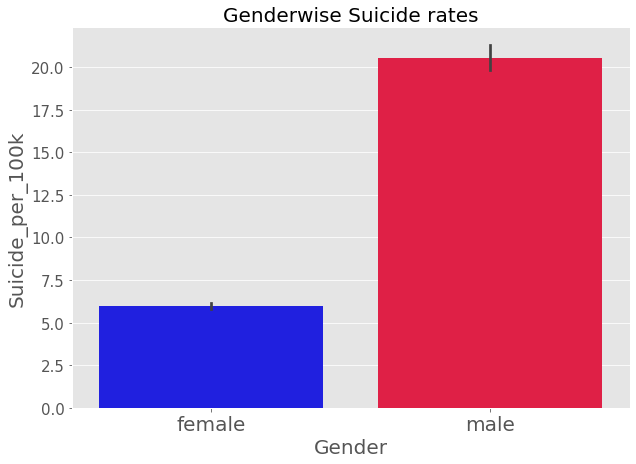

In [29]:
plt.figure(figsize=(10,7))
sns.barplot(x='Gender',y='gender_wise_suicides_per_100k',data=gender_wise_suicides_per_100k, palette = ['#0000FF','#FF0033'])
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 15)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Suicide_per_100k',fontsize=20)
plt.title('Genderwise Suicide rates',fontsize=20);

* From Above Bar graph we are still not get the correct trend of Suicide of Male vs Female. Let's Try to Split this and see it on line Graph

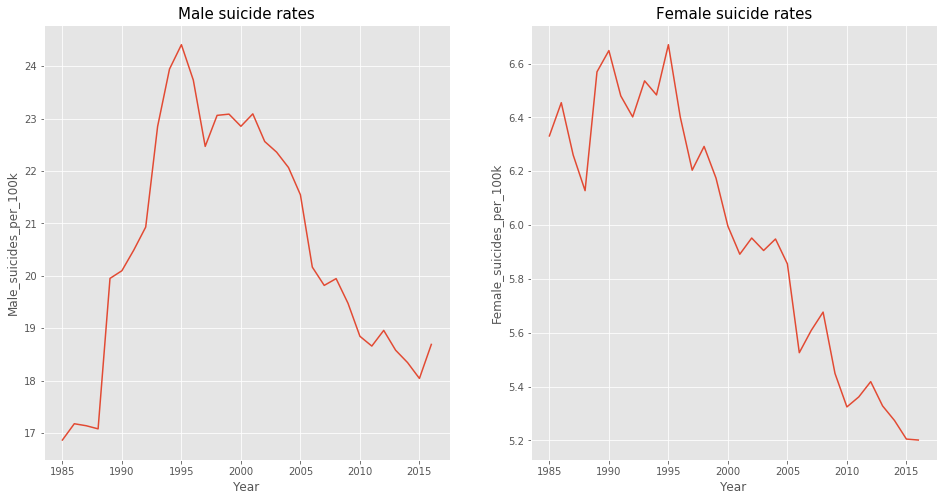

In [30]:
Male_suicides_per_100k = gender_wise_suicides_per_100k[gender_wise_suicides_per_100k['Gender'] == 'male']
Male_suicides_per_100k.columns = ['Male','Year','Male_suicides_per_100k']
Female_suicides_per_100k = gender_wise_suicides_per_100k[gender_wise_suicides_per_100k['Gender'] == 'female']
Female_suicides_per_100k.columns = ['Female','Year','Female_suicides_per_100k']
fig, axes = plt.subplots(1,2,figsize=(16,8))
sns.lineplot(data=Male_suicides_per_100k,x='Year',y='Male_suicides_per_100k',ax=axes[0])
axes[0].set_title('Male suicide rates',fontsize=15);
sns.lineplot(data=Female_suicides_per_100k,x='Year',y='Female_suicides_per_100k',ax=axes[1])
axes[1].set_title('Female suicide rates',fontsize=15);

## Asking and Question Answers

Q1: Top 10 Countries where suicide per 100k is the highest?

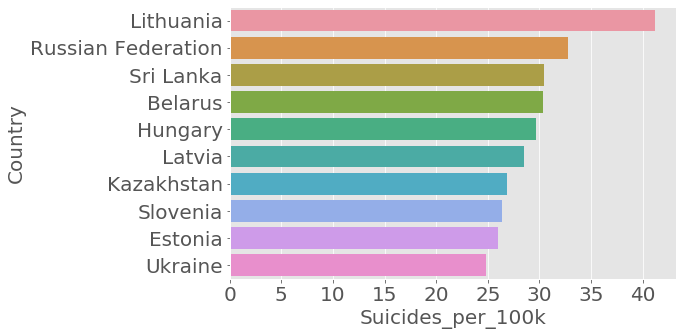

In [34]:
countries_df = pd.DataFrame((suicide_df.groupby(['country'])['suicides_no'].sum()/suicide_df.groupby(['country'])['population'].sum())*100000)
countries_df.reset_index(inplace=True)
countries_df.columns = ['Country','Suicides_per_100k']
countries_df.sort_values(by=['Suicides_per_100k'],ascending=False,inplace=True)
# Creating a dataframe for top 10 countries
countries_df = countries_df.head(10)
plt.figure(figsize=(8,5))
plt.xticks(fontsize=20)
plt.xlabel("Suicides_per_100k",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.yticks(fontsize=20)
sns.barplot(y='Country',x='Suicides_per_100k',data=countries_df);

Q2: Top Countries where suicide rates were least?

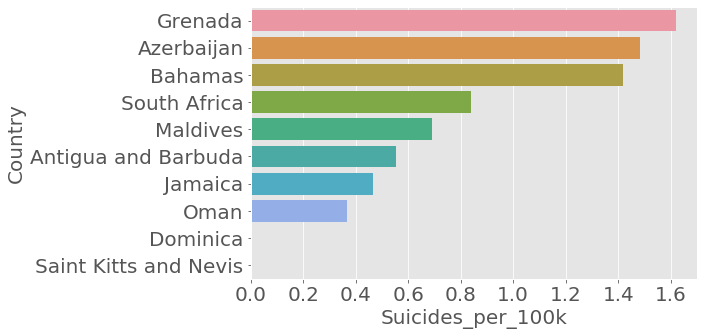

In [35]:
countries_df = pd.DataFrame((suicide_df.groupby(['country'])['suicides_no'].sum()/suicide_df.groupby(['country'])['population'].sum())*100000)
countries_df.reset_index(inplace=True)
countries_df.columns = ['Country','Suicides_per_100k']
countries_df.sort_values(by=['Suicides_per_100k'],ascending=False,inplace=True)
# Creating a dataframe for top 10 countries
countries_df = countries_df.tail(10)
plt.figure(figsize=(8,5))
plt.xticks(fontsize=20)
plt.xlabel("Suicides_per_100k",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.yticks(fontsize=20)
sns.barplot(y='Country',x='Suicides_per_100k',data=countries_df);

Q3: What is proportion of Both the Gender have commited suicide in last 2 years?

In [36]:
last_two_years_df = suicide_df[suicide_df['year']>=2013]
proportion_df = pd.DataFrame((last_two_years_df.groupby(['sex'])['sex'].count()/len(last_two_years_df))*100)
proportion_df.columns = ['Percentage']
proportion_df

,Percentage
sex,
female,50.0
male,50.0


* If You want to add more questions to this, please do let me know.

<img src="https://media.giphy.com/media/ZfK4cXKJTTay1Ava29/giphy.gif"/>

## References and Future Work

> - Check out the various resource used in this project:
   - Numerical computing with Numpy: https://jovian.ml/aakashns/python-numerical-computing-with-numpy
   - Numpy Documentation: https://numpy.org/devdocs/user/quickstart.html
   - User guide for Pandas: https://pandas.pydata.org/docs/user_guide/index.html 
   - Seaborn gallery: https://seaborn.pydata.org/examples/index.html
   - Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html
   - plotly tutorials : https://github.com/derekbanas/plotly-tutorial/blob/master/Plotly%20Tut.ipynb 
   - video tutorial :          https://www.youtube.com/watch?v=GGL6U0k8WYA&t=1958s